In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as md
import matplotlib.pyplot as plt

MEASUREMENTS = "Corrected Upscaled Measurement [MW]"

def plot_dataset(file: str, month: str, outputfile: str):
    data = pd.read_excel(file, skiprows=3)
    data['DateTime'] = pd.to_datetime(data['DateTime'], format = '%d/%m/%Y %H:%M')
    fig, ax = plt.subplots()
    sns.lineplot(ax = ax, data=data, x=data["DateTime"], y=data[MEASUREMENTS]).set_title(f"Recurring patterns in solar power for {month}")
    ax.xaxis.set_major_locator(md.DayLocator(interval = 1))
    ax.xaxis.set_major_formatter(md.DateFormatter('%d'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 0)
    ax.tick_params(axis = 'x', which = 'major', length = 10)
    ax.set_xlim(data['DateTime'].min(), data['DateTime'].max())
    ax.set_ylim([0, 6000])
    ax.set_xlabel(f"Day of month ({month})")
    fig.savefig(outputfile)


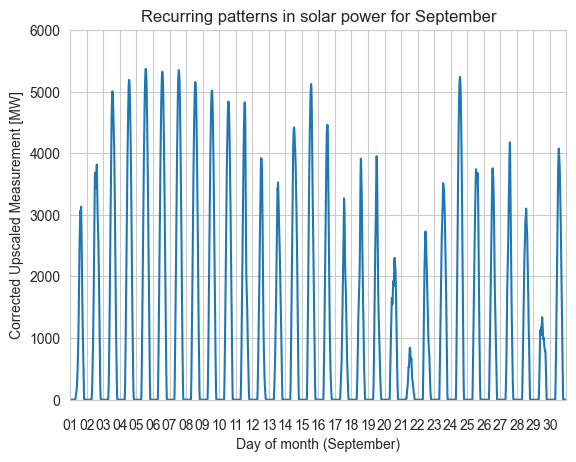

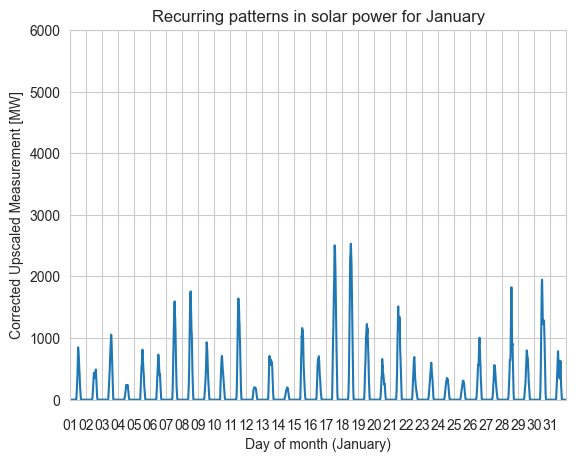

In [15]:
plot_dataset("data/SolarForecast_20230901-20230930.xls", "September", "figures/recurrent-pattern-september2023.png")
plot_dataset("data/SolarForecast_20230101-20230131.xls", "January", "figures/recurrent-pattern-january2023.png")


/var/folders/mr/4wlh6vyn3jg311q2fs206v_w0000gn/T/ipykernel_2859/1863992111.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


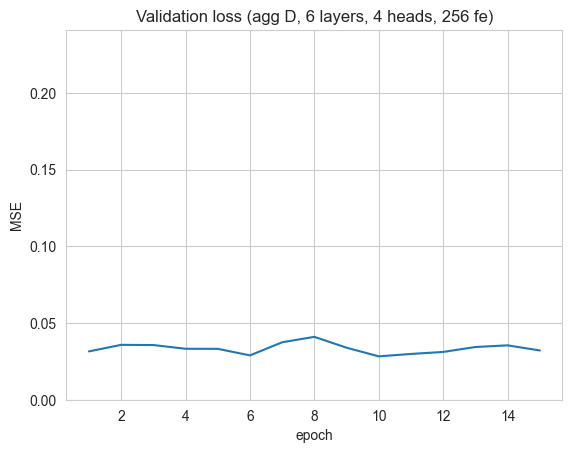

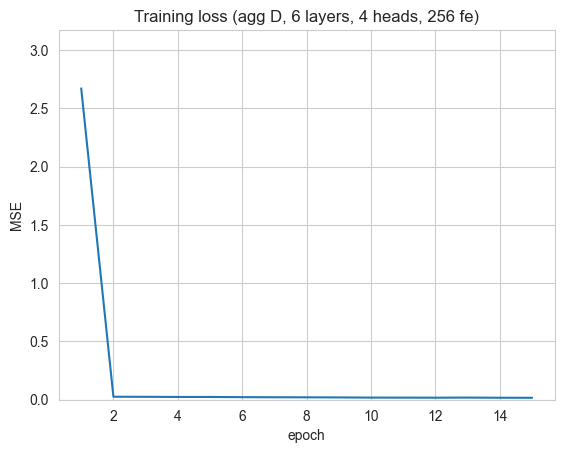

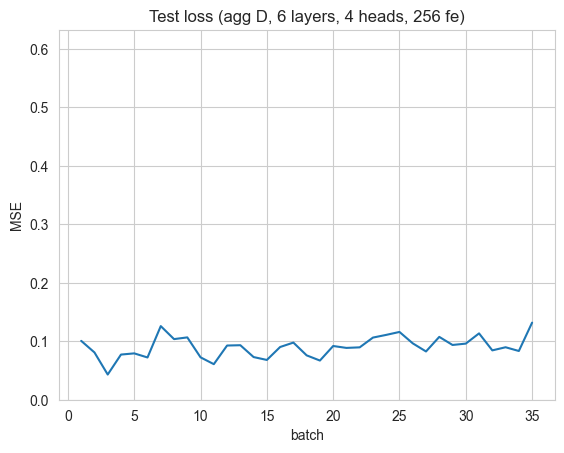

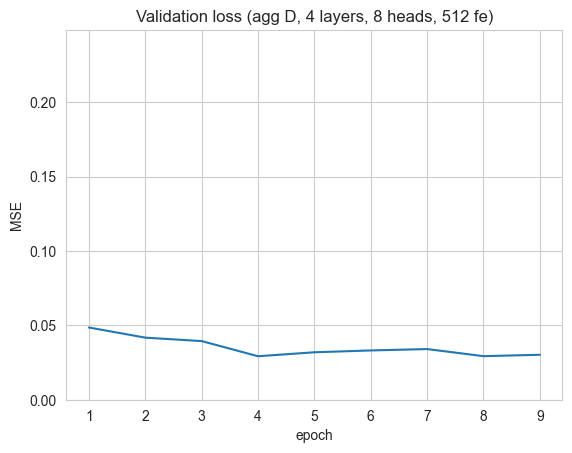

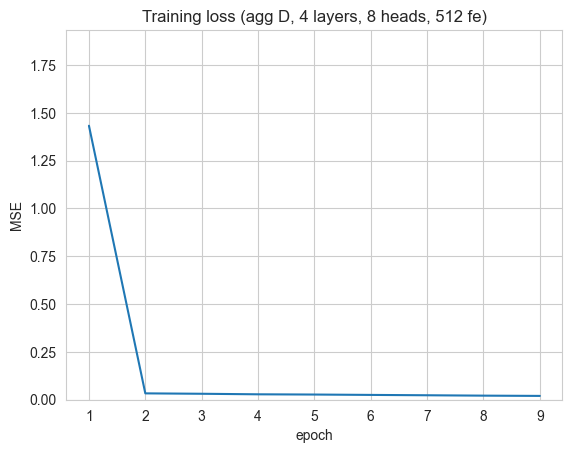

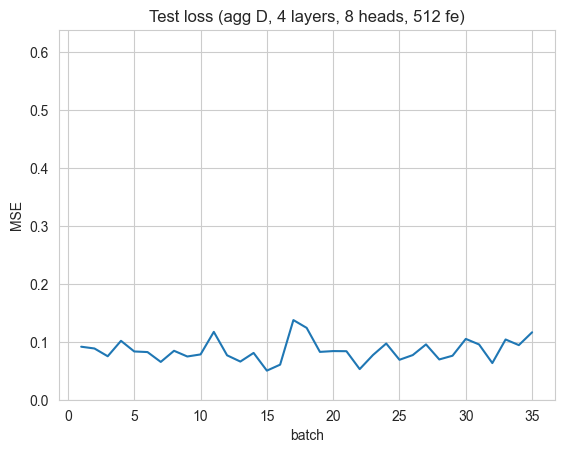

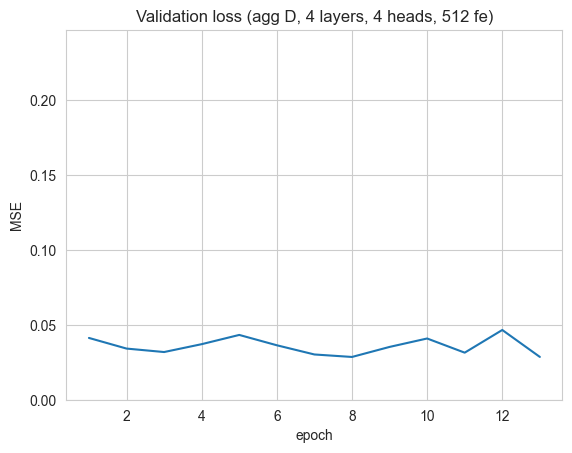

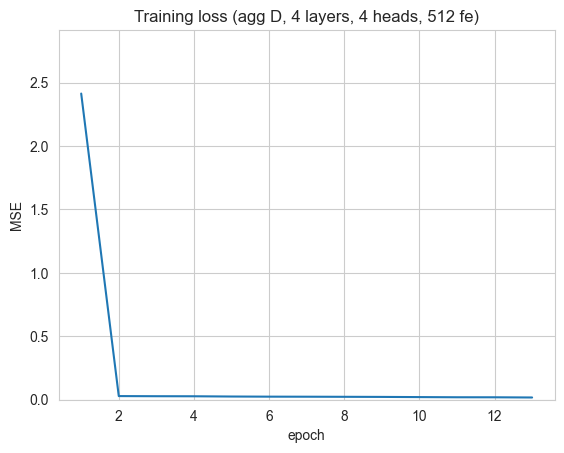

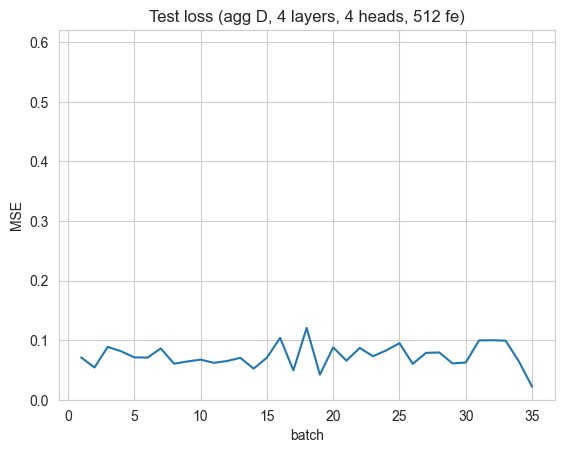

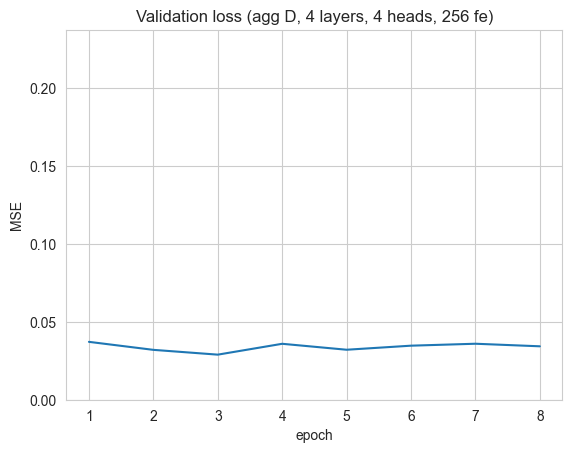

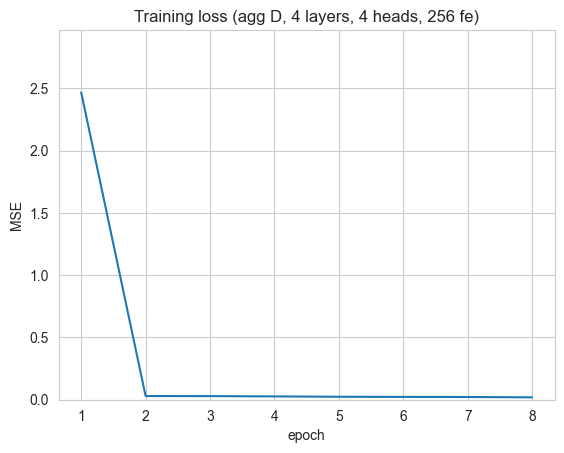

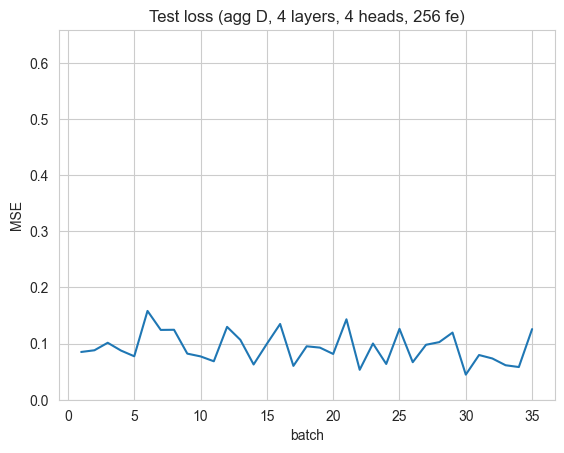

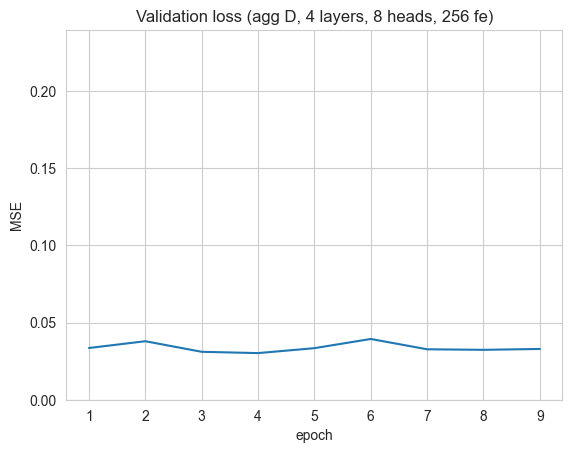

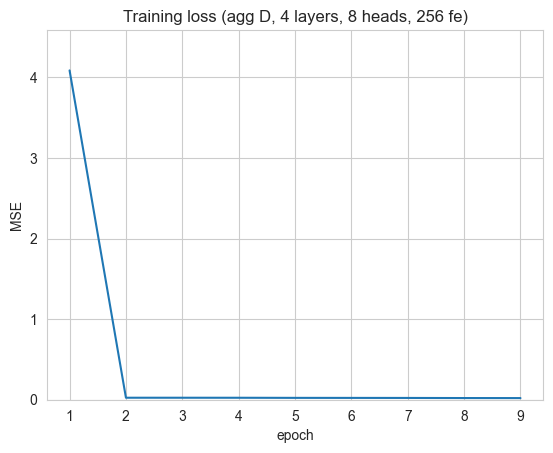

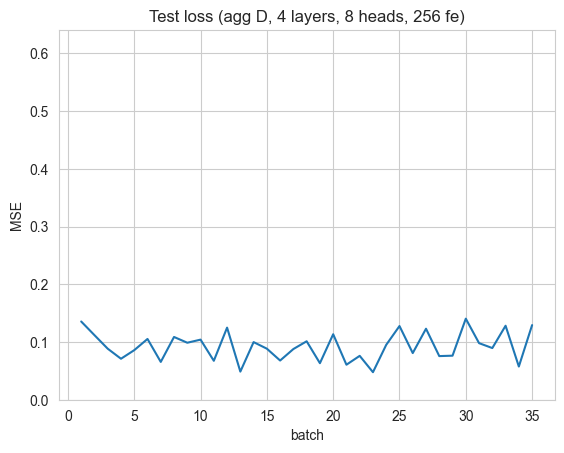

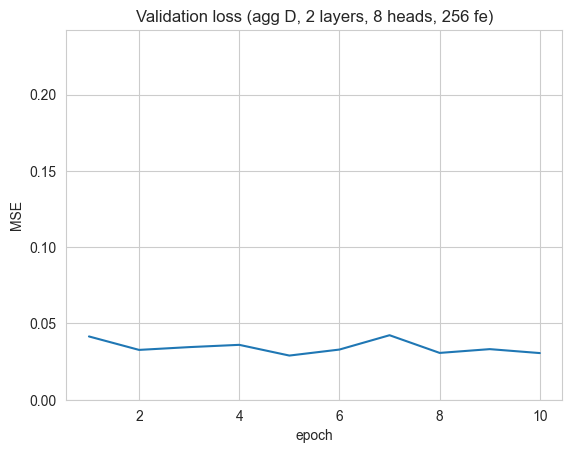

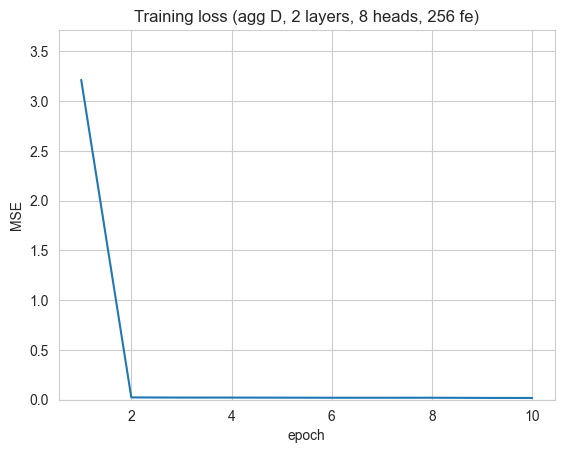

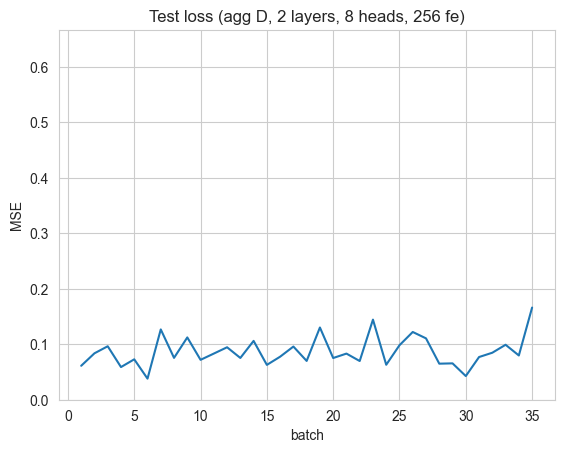

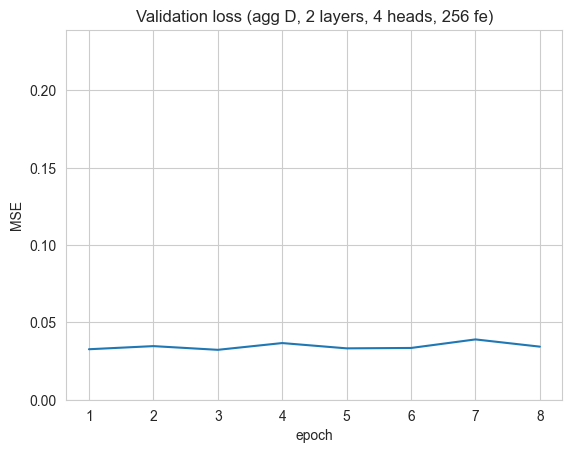

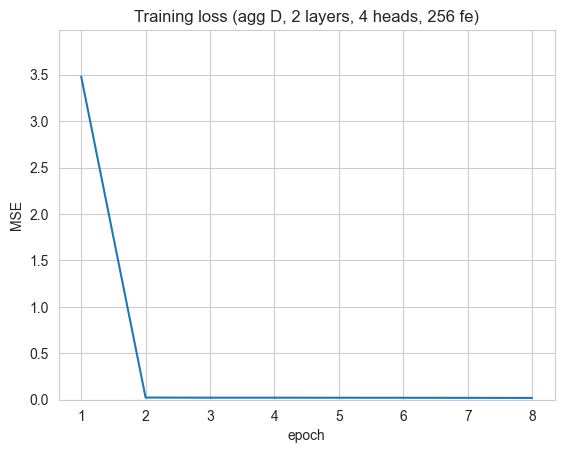

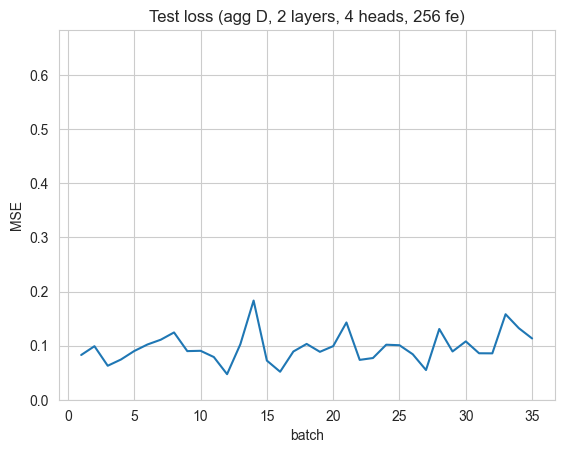

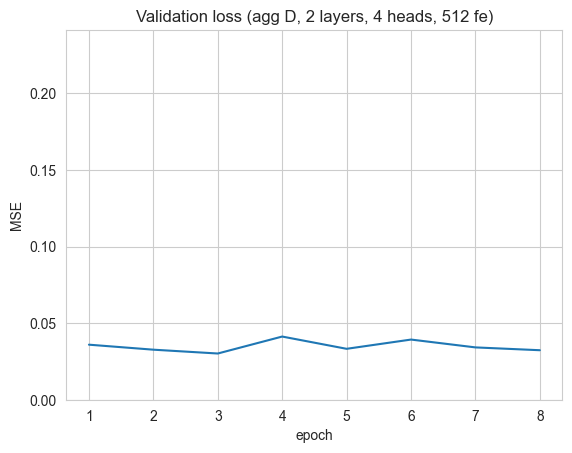

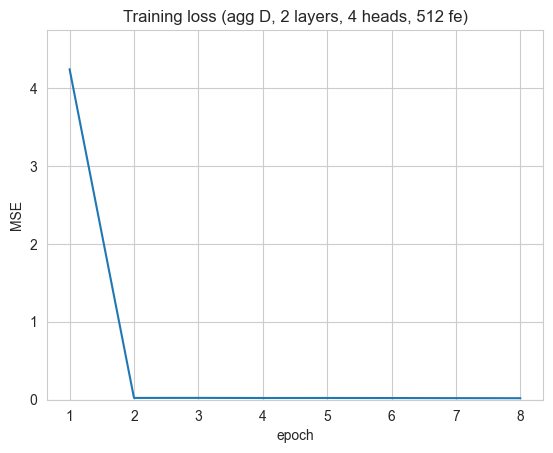

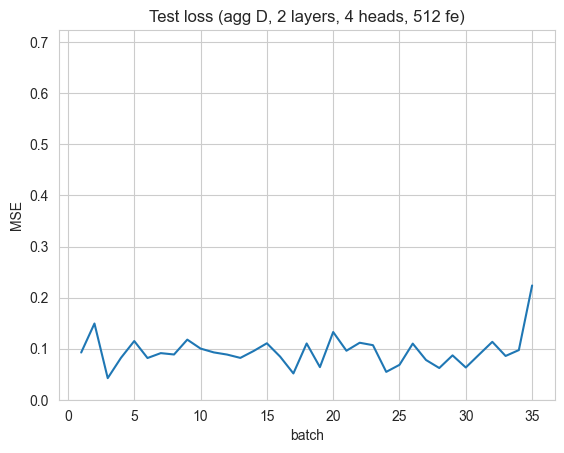

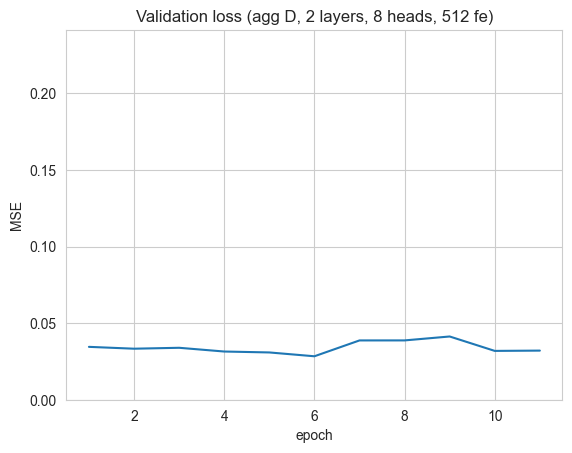

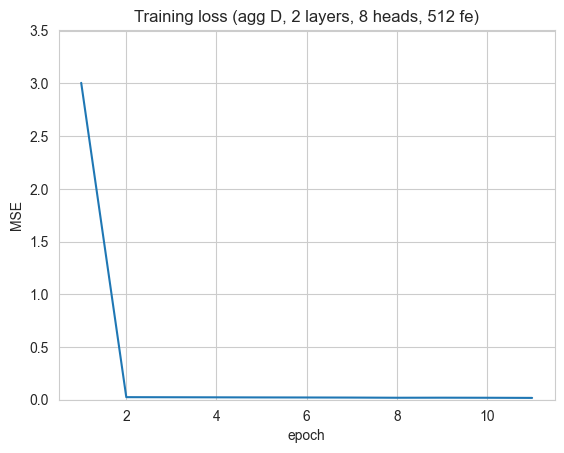

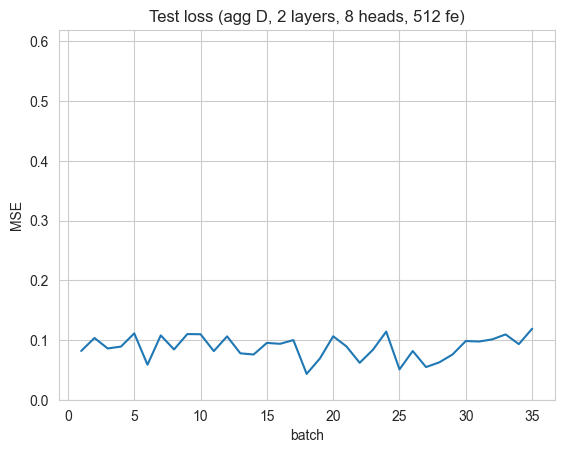

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as md
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from typing import *
import re
import os

def determine_params(filename: str) -> Tuple[str, int, int, int]:
    matches = re.search("(.*)-freq(.*)-layers(\d*)-heads(\d*)-fe(\d*)_(.*)_losses\.pkl", filename)
    return (str(matches.group(2)), int(matches.group(3)), int(matches.group(4)), int(matches.group(5)))

def figure_filename(kind: str, freq: str, layers: int, heads: int, fe: int) -> str:
    return f"./figures/{kind}-loss-freq{freq}-layers{layers}-heads{heads}-fe{fe}.png"

    
def plot_train_validation_loss(file: str):
    data = pd.read_pickle(file)
    freq, layers, heads, fe = determine_params(file)
    data['epoch'] = pd.Series([int(x) + 1 for x in range(len(data))])
    
    fig, ax = plt.subplots()
    g = sns.lineplot(ax = ax, data=data, x='epoch', y='validation')
    g.set_title(f"Validation loss (agg {freq}, {layers} layers, {heads} heads, {fe} fe)")
    g.set_ylabel("MSE")
    g.set_ylim([0, np.max(data['validation']) + 0.2])
    fig.savefig(figure_filename("validation", freq, layers, heads, fe))
    
    fig, ax = plt.subplots()
    g = sns.lineplot(ax = ax, data=data, x='epoch', y='training')
    g.set_title(f"Training loss (agg {freq}, {layers} layers, {heads} heads, {fe} fe)")
    g.set_ylabel("MSE")
    g.set_ylim([0, np.max(data['training']) + 0.5])
    fig.savefig(figure_filename("training", freq, layers, heads, fe))

def plot_test_loss(file: str):
    data = pd.read_pickle(file)
    freq, layers, heads, fe = determine_params(file)
    data['batch'] = pd.Series([int(x) + 1 for x in range(len(data))])
    
    fig, ax = plt.subplots()
    g = sns.lineplot(ax = ax, data=data, x='batch', y='test')
    g.set_title(f"Test loss (agg {freq}, {layers} layers, {heads} heads, {fe} fe)")
    g.set_ylabel("MSE")
    g.set_ylim([0, np.max(data['test']) + 0.5])
    fig.savefig(figure_filename("test", freq, layers, heads, fe))

for file in os.listdir("./weights"):
    if file.endswith("train_val_losses.pkl") and file.startswith("elia"):
        plot_train_validation_loss(os.path.join("./weights", file))
        plot_test_loss(os.path.join("./weights", file.removesuffix("train_val_losses.pkl") + "test_losses.pkl"))